In [25]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv("Academic_Performance.csv")

In [27]:
df

,Roll No,Name,Gender,Math,English,Science,Division,Address,Placement
0,1,Trushna,Female,100,80.0,92.0,A,Nashik,4
1,2,Prathamesh,Male,90,80.0,86.0,B,Nashik,4
2,3,Khushi,Female,1,98.0,37.0,A,Kolhapur,1
3,4,Om,Male,200,16.0,47.0,A,Nashik,2
4,5,Sakshi,Female,30,98.0,40.0,A,Mumbai,6
5,6,Pranav,Male,89,NaN,96.0,B,Solapur,3
6,7,Sneha,Female,98,23.0,NaN,A,Nashik,6
7,8,Keshav,Male,41,95.0,15.0,A,Pune,6
8,9,Shreya,Female,500,44.0,16.0,B,Mumbai,2
9,10,Ram,Male,75,99.0,97.0,B,NaN,4


In [28]:
df.isnull().sum()

Roll No      0
Name         0
Gender       2
Math         0
English      3
Science      1
Division     2
Address      2
Placement    0
dtype: int64

In [29]:
df['Gender'].fillna('Unknown',inplace=True)
df['Division'].fillna('Unknown',inplace=True)
df['Address'].fillna('Unknown',inplace=True)

In [30]:
df['English'].fillna(df['English'].mean(),inplace=True)
df['Science'].fillna(df['Science'].mean(),inplace=True)

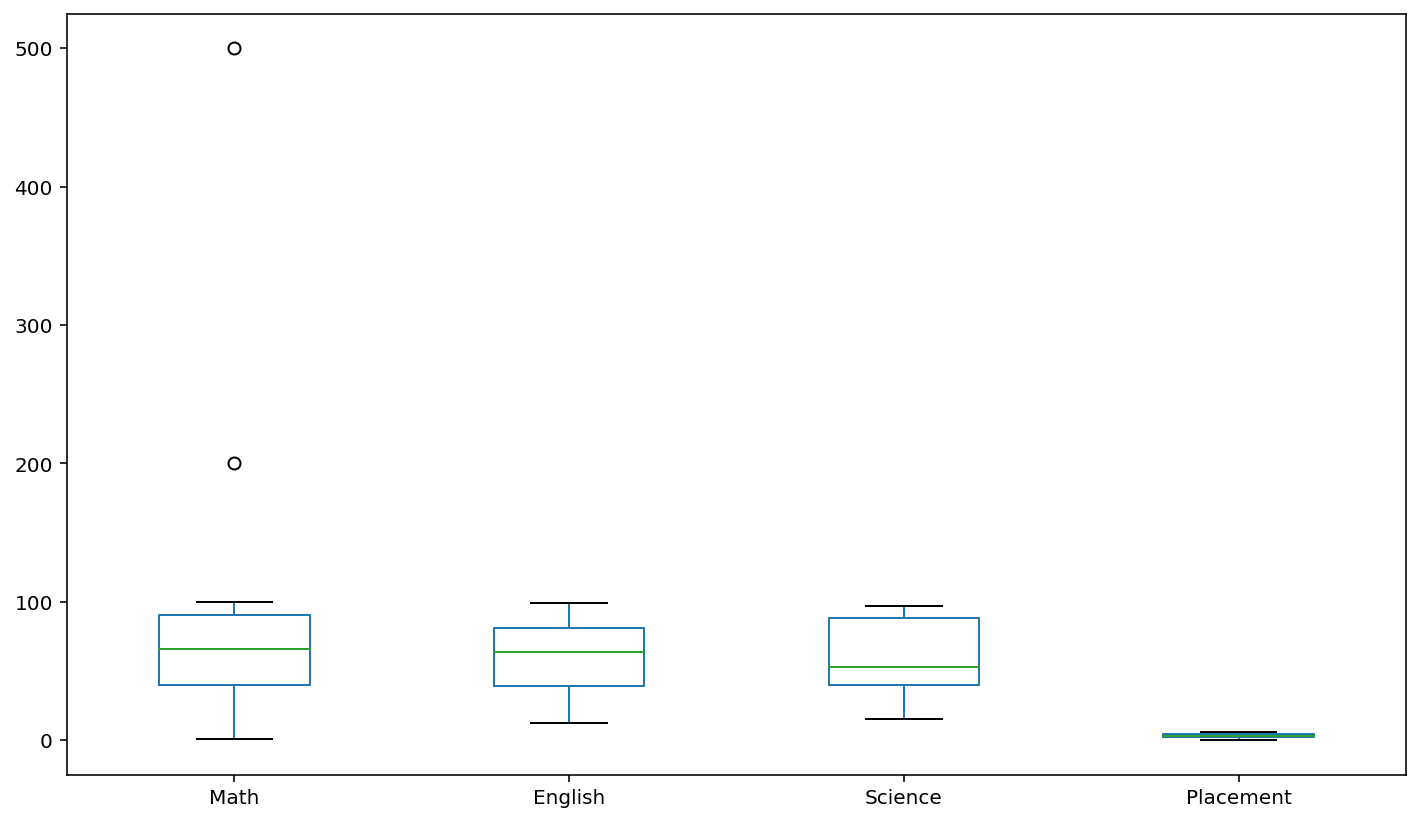

In [31]:
#Identify outliers using boxplot
import matplotlib.pyplot as plt

numerical_columns = ['Math', 'English', 'Science', 'Placement']
df[numerical_columns].boxplot(grid=False)
plt.show()


In [32]:
from scipy.stats import zscore

# Calculate Z-scores for numerical columns
z_scores = np.abs(zacscore(df[numerical_columns]))

# Identify outliers using Z-scores
outliers_zscore = np.where(z_scores > 3)
outlier_rows_zscore = outliers_zscore[0]

# Print the rows with outliers
print("Outliers (Z-score method):\n", df.iloc[outlier_rows_zscore])


Outliers (Z-score method):
    Roll No    Name  Gender  Math  English  Science Division Address  Placement
8        9  Shreya  Female   500     44.0     16.0        B  Mumbai          2


In [33]:
#DEAL WITH OUTLIERS

# Remove outliers
#data = data.drop(outlier_rows_zscore)

In [36]:
# Capping outliers
df[numerical_columns] = np.where(z_scores > 3, np.nan, df[numerical_columns])


In [39]:
df.isnull().sum()

Roll No      0
Name         0
Gender       0
Math         1
English      0
Science      0
Division     0
Address      0
Placement    0
dtype: int64

In [40]:
df['Math'].fillna(df['Math'].mean(),inplace=True)

In [41]:
df

,Roll No,Name,Gender,Math,English,Science,Division,Address,Placement
0,1,Trushna,Female,100.000000,80.000000,92.000000,A,Nashik,4.0
1,2,Prathamesh,Male,90.000000,80.000000,86.000000,B,Nashik,4.0
2,3,Khushi,Female,1.000000,98.000000,37.000000,A,Kolhapur,1.0
3,4,Om,Male,200.000000,16.000000,47.000000,A,Nashik,2.0
4,5,Sakshi,Female,30.000000,98.000000,40.000000,A,Mumbai,6.0
5,6,Pranav,Male,89.000000,60.588235,96.000000,B,Solapur,3.0
6,7,Sneha,Female,98.000000,23.000000,59.842105,A,Nashik,6.0
7,8,Keshav,Male,41.000000,95.000000,15.000000,A,Pune,6.0
8,9,Shreya,Female,64.368421,44.000000,16.000000,B,Mumbai,2.0
9,10,Ram,Male,75.000000,99.000000,97.000000,B,Unknown,4.0
